# Solos in the *Weimar Jazz Database*

**Disclaimer: I am not the expert here!**

In this session, we will have a look at is the [*Jazzomat Research Project*](https://jazzomat.hfm-weimar.de/) that contains the *Weimar Jazz Database* (WJazzD).
Let us first browse the site.

One of the outcomes of this research project is the freely-available book:

* Pfleiderer, M., Frieler, K., Abeßer, J., Zaddach, W.-G., & Burkhard, B. (Eds.) (2017). Inside the Jazzomat. New Perspectives for Jazz Research. Mainz: Schott Campus ([Open Access](https://schott-campus.com/jazzomat/)).

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

The WJazzD can be downloaded at https://jazzomat.hfm-weimar.de/download/download.html 
A local copy of the database is stored at `data/wjazz.db`. We use the `sqlite3` library to connect to this database.

In [2]:
conn = sqlite3.connect("data/wjazzd.db")

In [3]:
conn

We can now use `pandas` to read the data out of the database.

In [4]:
solos = pd.read_sql("SELECT * FROM melody", con=conn)

The `"SELECT * FROM melody"` means "Select everything from the table 'melody' in the database". Let's look at the first ten entries. 

Likewise, we can select the `composition_info` table that contains a lot of metadata for the solos:

In [5]:
solos_meta = pd.read_sql("SELECT * from solo_info", con=conn)

The `.shape` attribute shows us how many solos are in the database.

In [6]:
solos_meta.shape

(456, 17)

The `.sample()` method draws a number of rows at random from a DataFrame.

In [13]:
solos_meta.sample(5)

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count
429,430,260,236,140,Wayne Shorter,Eighty-One,,1,ts,POSTBOP,138.4,MEDIUM,SWING,F-maj,4/4,A1: ||Fsus7 |Bbsus7 |Fsus7 |Fsus7 |Bbs...,5
440,441,335,295,180,Woody Shaw,Rosewood,,1,tp,POSTBOP,171.7,MEDIUM UP,LATIN/FUNK,,4/4,A1: ||G-79 F-79 |G-79 F-79 |C-79 Bb-79 |Gb79 ...,1
240,241,152,137,76,Johnny Hodges,Bunny,,1,as,SWING,114.4,MEDIUM,SWING,C-maj,4/4,A1: ||A-7 D7 |G E7 |A-7 D7 |D-7 G7 |C F7 |Bb B...,1
326,327,174,158,87,Miles Davis,Walkin',,1,tp,HARDBOP,127.7,MEDIUM,SWING,F-maj,4/4,A1: ||F7 |Bb7 |F7 |F7 |Bb7 |Bb7 |F...,7
224,225,199,177,103,John Coltrane,Impressions,1963,1,ts,POSTBOP,278.7,UP,SWING,D-min,4/4,A1: ||D-7 |D-7 |D-7 |D-7 |D-7 |D-7 ...,13


The first rows of a DataFrame can be accessed with the `.head()` method...

In [19]:
solos.head()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,f0_mod,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev
0,1,1,10.343492,65.0,0.138776,4,1,0,1,1,...,,0.126209,66.526087,5.541147,0.307692,0.389466,1.056169,37.794261,12.932532,-0.328442
1,2,1,10.637642,63.0,0.171247,4,4,0,2,1,...,,0.349751,69.133321,2.912412,0.250000,0.468687,1.120317,6.365930,6.956935,11.135423
2,3,1,10.843719,58.0,0.081270,4,4,0,2,4,...,,0.094051,66.352130,3.564563,0.428571,0.531354,1.310389,68.010392,NaN,32.366787
3,4,1,10.948209,61.0,0.235102,4,1,0,3,1,...,,0.521187,66.484173,2.414298,0.818182,0.559333,0.984047,15.443906,5.867151,-3.374696
4,5,1,11.232653,63.0,0.130612,4,1,0,4,1,...,,0.560737,71.699054,2.185794,0.166667,0.438973,1.061262,11.444363,8.329975,6.377737


... and the last rows with the `.tail()` method.

In [16]:
solos.tail()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,f0_mod,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev
200804,200805,456,63.135057,57.0,0.168345,4,2,53,4,2,...,,1.113380,72.169552,6.896394,0.687500,0.581956,1.271747,191.074095,10.966972,-11.891698
200805,200806,456,63.303401,55.0,0.087075,4,3,54,1,1,...,,0.491496,69.732265,1.814723,0.500000,0.595212,1.339060,40.375449,NaN,-99.173779
200806,200807,456,63.390476,57.0,0.191565,4,3,54,1,2,...,slide,1.187058,76.628621,2.628726,0.411765,0.590950,1.432802,104.823845,11.148561,-2.911604
200807,200808,456,63.640091,59.0,0.406349,4,1,54,2,1,...,,0.972676,66.042058,3.690577,0.000000,0.334937,1.082549,165.810976,2.659723,14.311001
200808,200809,456,64.058050,52.0,1.433832,4,2,54,3,2,...,vibrato,0.368321,58.174931,9.418678,0.053030,0.400571,1.278890,66.932198,2.153916,-9.381310


As we already know, the `.shape` attribute shows the overall size of the table.

In [20]:
solos.shape

(200809, 26)

The `solos` table contains 26 columns that cannot be displayed at once. We can have a look at the column names by using the `.columns` attribute.

In [21]:
solos.columns

Index(['eventid', 'melid', 'onset', 'pitch', 'duration', 'period', 'division',
       'bar', 'beat', 'tatum', 'subtatum', 'num', 'denom', 'beatprops',
       'beatdur', 'tatumprops', 'f0_mod', 'loud_max', 'loud_med', 'loud_sd',
       'loud_relpos', 'loud_cent', 'loud_s2b', 'f0_range', 'f0_freq_hz',
       'f0_med_dev'],
      dtype='object')

A description of what these columns contain is stated on the website: https://jazzomat.hfm-weimar.de/dbformat/dbformat.html

For our analyses it will be usefull to have also the name of the performer in the `solos` DataFrame. We create a **dictionary** that maps the `melid` (unique identification number for each solo) to the name of the performer.

In [26]:
mapper = dict( solos_meta[["melid", "performer"]].values )
mapper

{1: 'Art Pepper',
 2: 'Art Pepper',
 3: 'Art Pepper',
 4: 'Art Pepper',
 5: 'Art Pepper',
 6: 'Art Pepper',
 7: 'Benny Carter',
 8: 'Benny Carter',
 9: 'Benny Carter',
 10: 'Benny Carter',
 11: 'Benny Carter',
 12: 'Benny Carter',
 13: 'Benny Carter',
 14: 'Benny Goodman',
 15: 'Benny Goodman',
 16: 'Benny Goodman',
 17: 'Benny Goodman',
 18: 'Benny Goodman',
 19: 'Benny Goodman',
 20: 'Benny Goodman',
 21: 'Ben Webster',
 22: 'Ben Webster',
 23: 'Ben Webster',
 24: 'Ben Webster',
 25: 'Ben Webster',
 26: 'Bix Beiderbecke',
 27: 'Bix Beiderbecke',
 28: 'Bix Beiderbecke',
 29: 'Bix Beiderbecke',
 30: 'Bix Beiderbecke',
 31: 'Bob Berg',
 32: 'Bob Berg',
 33: 'Bob Berg',
 34: 'Bob Berg',
 35: 'Bob Berg',
 36: 'Bob Berg',
 37: 'Bob Berg',
 38: 'Branford Marsalis',
 39: 'Branford Marsalis',
 40: 'Branford Marsalis',
 41: 'Branford Marsalis',
 42: 'Branford Marsalis',
 43: 'Branford Marsalis',
 44: 'Buck Clayton',
 45: 'Buck Clayton',
 46: 'Buck Clayton',
 47: 'Cannonball Adderley',
 48: 'Ca

We can now use this dictionary to create a new column `performer` in the `solos` DataFrame.

In [28]:
solos["performer"] = solos["melid"].map(mapper)

In [29]:
solos.head()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev,performer
0,1,1,10.343492,65.0,0.138776,4,1,0,1,1,...,0.126209,66.526087,5.541147,0.307692,0.389466,1.056169,37.794261,12.932532,-0.328442,Art Pepper
1,2,1,10.637642,63.0,0.171247,4,4,0,2,1,...,0.349751,69.133321,2.912412,0.250000,0.468687,1.120317,6.365930,6.956935,11.135423,Art Pepper
2,3,1,10.843719,58.0,0.081270,4,4,0,2,4,...,0.094051,66.352130,3.564563,0.428571,0.531354,1.310389,68.010392,NaN,32.366787,Art Pepper
3,4,1,10.948209,61.0,0.235102,4,1,0,3,1,...,0.521187,66.484173,2.414298,0.818182,0.559333,0.984047,15.443906,5.867151,-3.374696,Art Pepper
4,5,1,11.232653,63.0,0.130612,4,1,0,4,1,...,0.560737,71.699054,2.185794,0.166667,0.438973,1.061262,11.444363,8.329975,6.377737,Art Pepper


In [30]:
solos.tail()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev,performer
200804,200805,456,63.135057,57.0,0.168345,4,2,53,4,2,...,1.113380,72.169552,6.896394,0.687500,0.581956,1.271747,191.074095,10.966972,-11.891698,Zoot Sims
200805,200806,456,63.303401,55.0,0.087075,4,3,54,1,1,...,0.491496,69.732265,1.814723,0.500000,0.595212,1.339060,40.375449,NaN,-99.173779,Zoot Sims
200806,200807,456,63.390476,57.0,0.191565,4,3,54,1,2,...,1.187058,76.628621,2.628726,0.411765,0.590950,1.432802,104.823845,11.148561,-2.911604,Zoot Sims
200807,200808,456,63.640091,59.0,0.406349,4,1,54,2,1,...,0.972676,66.042058,3.690577,0.000000,0.334937,1.082549,165.810976,2.659723,14.311001,Zoot Sims
200808,200809,456,64.058050,52.0,1.433832,4,2,54,3,2,...,0.368321,58.174931,9.418678,0.053030,0.400571,1.278890,66.932198,2.153916,-9.381310,Zoot Sims


## Melodic arc?

Does the melodic arc also appear in the Jazz solos?

In [31]:
def notelist(melid):
    
    solo = solos[solos["melid"] == melid]
    
    solo = solo[["pitch", "duration"]]
    solo["onset"] = solo["duration"].cumsum()
    return solo

In [32]:
notelist(1)

,pitch,duration,onset
0,65.0,0.138776,0.138776
1,63.0,0.171247,0.310023
2,58.0,0.081270,0.391293
3,61.0,0.235102,0.626395
4,63.0,0.130612,0.757007
...,...,...,...
525,66.0,0.137143,80.645238
526,65.0,0.101587,80.746825
527,63.0,0.104490,80.851315
528,62.0,0.110295,80.961610


In [33]:
def plot_melodic_profile(notelist, ax=None, c=None, mean=False, Z=False, sections=False, standardized=False):
    
    if ax == None:
        ax = plt.gca()
    
    if standardized:
        x = notelist["Rel. Onset"]
        y = notelist["Rel. MIDI Pitch"]
    else:
        x = notelist["onset"]
        y = notelist["pitch"]
    
    ax.step(x,y, color=c)
    
    if mean:
        ax.axhline(y.mean(), color="gray", linestyle="--")
        
    if sections:
        for l in [ x.max() * i for i in [ 1/4, 1/2, 3/4] ]:
            ax.axvline(l, color="gray", linewidth=1, linestyle="--")

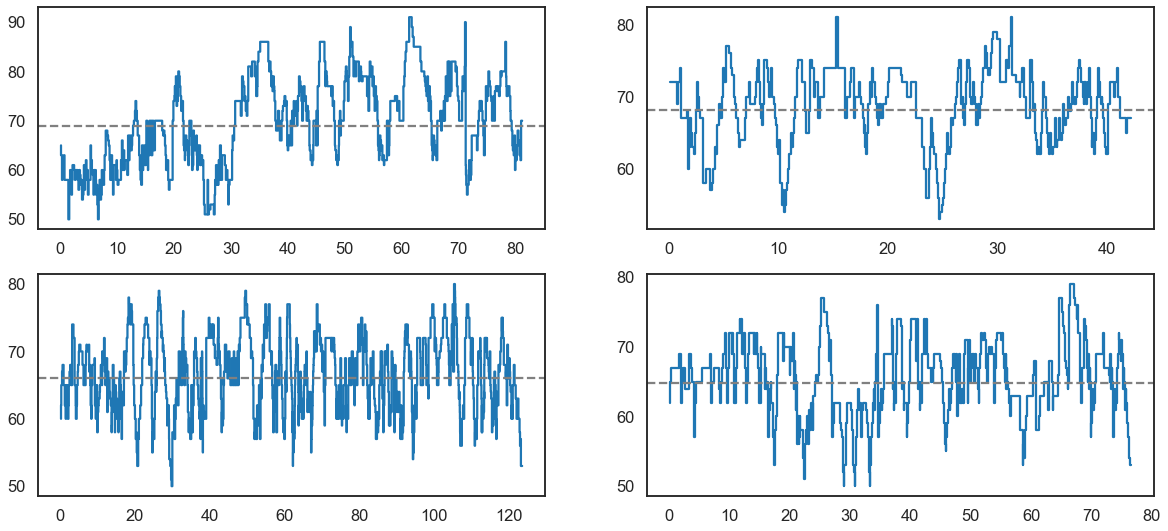

In [34]:
fig, axes = plt.subplots(2,2, figsize=(20,9))
axes = axes.flatten()

plot_melodic_profile(notelist(1), ax=axes[0], mean=True)
plot_melodic_profile(notelist(77), ax=axes[1], mean=True)
plot_melodic_profile(notelist(50), ax=axes[2], mean=True)
plot_melodic_profile(notelist(233), ax=axes[3], mean=True)

In [35]:
def standardize(notelist):
    """
    Takes a notelist as input and returns a standardized version.
    """
    
    notelist["Rel. MIDI Pitch"] = (notelist["pitch"] - notelist["pitch"].mean()) / notelist["pitch"].std()
    notelist["Rel. Duration"] = notelist["duration"] / notelist["duration"].sum()
    notelist["Rel. Onset"] = notelist["onset"] / notelist["onset"].max()
    
    return notelist

In [37]:
standardize(notelist(1))

,pitch,duration,onset,Rel. MIDI Pitch,Rel. Duration,Rel. Onset
0,65.0,0.138776,0.138776,-0.460594,0.001710,0.001710
1,63.0,0.171247,0.310023,-0.697714,0.002110,0.003820
2,58.0,0.081270,0.391293,-1.290513,0.001001,0.004822
3,61.0,0.235102,0.626395,-0.934833,0.002897,0.007719
4,63.0,0.130612,0.757007,-0.697714,0.001610,0.009329
...,...,...,...,...,...,...
525,66.0,0.137143,80.645238,-0.342034,0.001690,0.993794
526,65.0,0.101587,80.746825,-0.460594,0.001252,0.995046
527,63.0,0.104490,80.851315,-0.697714,0.001288,0.996334
528,62.0,0.110295,80.961610,-0.816274,0.001359,0.997693


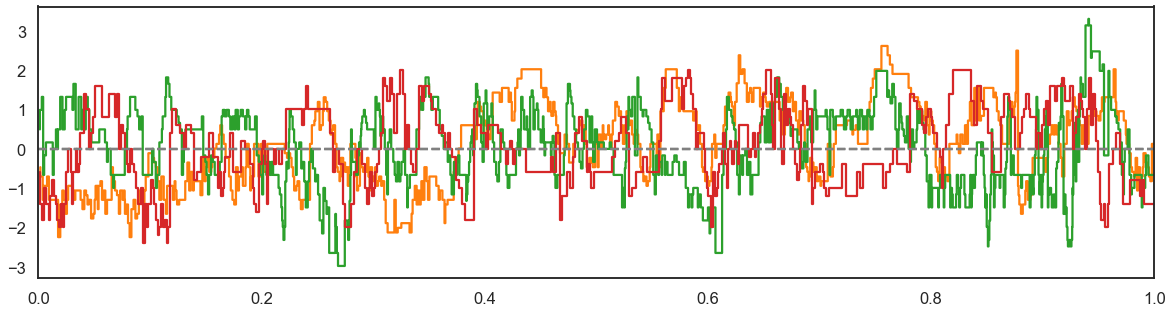

In [51]:
fig, ax = plt.subplots(figsize=(20,5))

for i in range(4):
    plot_melodic_profile(standardize(notelist(i)), 
                         mean=True, 
                         standardized=True)
plt.xlim(0,1)
plt.show()

In [41]:
big_df = pd.concat([standardize(notelist(i)) for i in range(solos_meta.shape[0])])

In [44]:
solos

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev,performer
0,1,1,10.343492,65.0,0.138776,4,1,0,1,1,...,0.126209,66.526087,5.541147,0.307692,0.389466,1.056169,37.794261,12.932532,-0.328442,Art Pepper
1,2,1,10.637642,63.0,0.171247,4,4,0,2,1,...,0.349751,69.133321,2.912412,0.250000,0.468687,1.120317,6.365930,6.956935,11.135423,Art Pepper
2,3,1,10.843719,58.0,0.081270,4,4,0,2,4,...,0.094051,66.352130,3.564563,0.428571,0.531354,1.310389,68.010392,NaN,32.366787,Art Pepper
3,4,1,10.948209,61.0,0.235102,4,1,0,3,1,...,0.521187,66.484173,2.414298,0.818182,0.559333,0.984047,15.443906,5.867151,-3.374696,Art Pepper
4,5,1,11.232653,63.0,0.130612,4,1,0,4,1,...,0.560737,71.699054,2.185794,0.166667,0.438973,1.061262,11.444363,8.329975,6.377737,Art Pepper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200804,200805,456,63.135057,57.0,0.168345,4,2,53,4,2,...,1.113380,72.169552,6.896394,0.687500,0.581956,1.271747,191.074095,10.966972,-11.891698,Zoot Sims
200805,200806,456,63.303401,55.0,0.087075,4,3,54,1,1,...,0.491496,69.732265,1.814723,0.500000,0.595212,1.339060,40.375449,NaN,-99.173779,Zoot Sims
200806,200807,456,63.390476,57.0,0.191565,4,3,54,1,2,...,1.187058,76.628621,2.628726,0.411765,0.590950,1.432802,104.823845,11.148561,-2.911604,Zoot Sims
200807,200808,456,63.640091,59.0,0.406349,4,1,54,2,1,...,0.972676,66.042058,3.690577,0.000000,0.334937,1.082549,165.810976,2.659723,14.311001,Zoot Sims


In [43]:
big_df

,pitch,duration,onset,Rel. MIDI Pitch,Rel. Duration,Rel. Onset
0,65.0,0.138776,0.138776,-0.460594,0.001710,0.001710
1,63.0,0.171247,0.310023,-0.697714,0.002110,0.003820
2,58.0,0.081270,0.391293,-1.290513,0.001001,0.004822
3,61.0,0.235102,0.626395,-0.934833,0.002897,0.007719
4,63.0,0.130612,0.757007,-0.697714,0.001610,0.009329
...,...,...,...,...,...,...
200585,62.0,0.870748,68.588934,0.014206,0.012540,0.987794
200586,57.0,0.133515,68.722449,-0.896471,0.001923,0.989717
200587,62.0,0.139320,68.861769,0.014206,0.002006,0.991723
200588,61.0,0.133515,68.995283,-0.167930,0.001923,0.993646


In [62]:
solos_meta["performer"].unique()

array(['Art Pepper', 'Benny Carter', 'Benny Goodman', 'Ben Webster',
       'Bix Beiderbecke', 'Bob Berg', 'Branford Marsalis', 'Buck Clayton',
       'Cannonball Adderley', 'Charlie Parker', 'Charlie Shavers',
       'Chet Baker', 'Chris Potter', 'Chu Berry', 'Clifford Brown',
       'Coleman Hawkins', 'Curtis Fuller', 'David Liebman',
       'David Murray', 'Dexter Gordon', 'Dickie Wells', 'Dizzy Gillespie',
       'Don Byas', 'Don Ellis', 'Eric Dolphy', 'Fats Navarro',
       'Freddie Hubbard', 'George Coleman', 'Gerry Mulligan',
       'Hank Mobley', 'Harry Edison', 'Henry Allen', 'Herbie Hancock',
       'J.C. Higginbotham', 'J.J. Johnson', 'Joe Henderson', 'Joe Lovano',
       'John Abercrombie', 'John Coltrane', 'Johnny Dodds',
       'Johnny Hodges', 'Joshua Redman', 'Kai Winding', 'Kenny Dorham',
       'Kenny Garrett', 'Kenny Wheeler', 'Kid Ory', 'Lee Konitz',
       'Lee Morgan', 'Lester Young', 'Lionel Hampton', 'Louis Armstrong',
       'Michael Brecker', 'Miles Davis', 'M

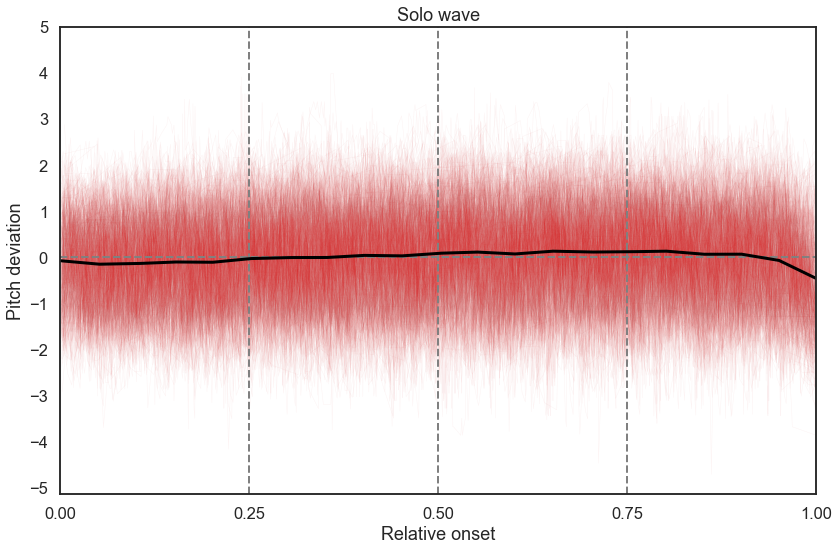

Wall time: 7.76 s


In [67]:
%%time

fig, ax = plt.subplots(figsize=(12,8))

artists = ["Louis Armstrong"]

# for i, (artist, group) in enumerate(solos.groupby("performer")):
#     if artist in artists:
#         for j, group in group.groupby("melid"):
#             solo = standardize(notelist(j))
#             x = solo["Rel. Onset"]
#             y = solo["Rel. MIDI Pitch"]
#             ax. plot(x,y, lw=.5, c="tab:red", alpha=.5)

for ID in range(solos_meta.shape[0]):
    solo = standardize(notelist(ID))
    x = solo["Rel. Onset"]
    y = solo["Rel. MIDI Pitch"]
    ax. plot(x,y, lw=.5, c="tab:red", alpha=.05)
        
ax.axvline(.25, lw=2, ls="--", c="gray")
ax.axvline(.5, lw=2, ls="--", c="gray")
ax.axvline(.75, lw=2, ls="--", c="gray")
ax.axhline(0, lw=2, ls="--", c="gray")

lowess = sm.nonparametric.lowess
big_x = big_df["Rel. Onset"]
big_y = big_df["Rel. MIDI Pitch"]
big_z = lowess(big_y, big_x, frac=1/10, delta=1/20)
ax.plot(big_z[:,0], big_z[:,1], c="black", lw=3)

plt.title("Solo wave")
plt.xlabel("Relative onset")
plt.ylabel("Pitch deviation")
plt.xticks(np.linspace(0,1,5))
plt.yticks(np.linspace(-5,5,11))
plt.xlim(0,1)

plt.tight_layout()
plt.savefig("img/jazz_melodic_arc.png")
plt.show()

## Pitch vs loudness

Above we have already analyzed some melodic profiles and seen that, on average, the Jazz solos tend not to follow the melodic arch on a global scale. Now, we ask whether the pitch of the notes in the solos are related to another important feature of performance: loudness. The WJazzD contains several measures for loudness (compare the columns in the `solos` DataFrame). Here, we focus on the "Median loudness" which is stored in the `loud_med` column.

Let us look at an example. 

In [68]:
example_solo = solos[ solos["melid"] == 233 ][["pitch", "loud_med"]]

In [69]:
example_solo

,pitch,loud_med
115075,62.0,67.082700
115076,65.0,65.345677
115077,67.0,66.323539
115078,69.0,69.204257
115079,62.0,69.059581
...,...,...
115549,59.0,61.083907
115550,57.0,58.345887
115551,55.0,65.132786
115552,54.0,59.595735


We can get a visual impression of whether there might be a direct relation between the two features by plotting it and drawing a regression line. For this, the `regplot()` function of the `seaborn` library is well-suited.

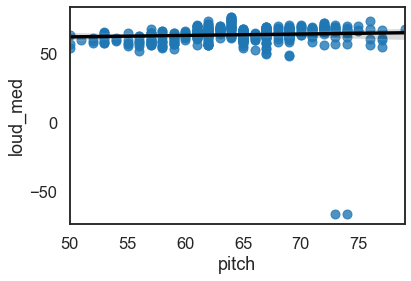

In [71]:
sns.regplot(data=example_solo, x="pitch", y="loud_med", line_kws={"color":"black"});

There seems to be no clear relation; no matter how high the pitch, the loudness stays more or less the same. Let's look at another example!

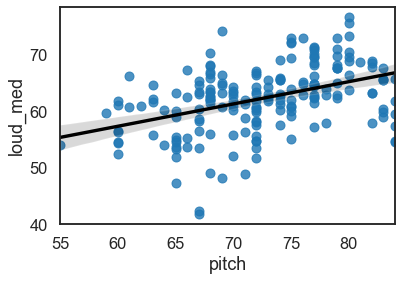

In [73]:
example_solo2 = solos[ solos["melid"] == 333 ][["pitch", "loud_med"]]

sns.regplot(data=example_solo2, x="pitch", y="loud_med", line_kws={"color":"black"});

In this case, there is a positive trend. The higher the pitch, the louder the performer plays. Since we have now two different examples - in one case no relation, in the other case a positive correlation - we should now look at whether there is a trend emerging from all solos taken together.

## The "rain cloud" of Jazz solos

We now take all 200'809 notes from all solos and look at the relation between their pitch and their median loudness.

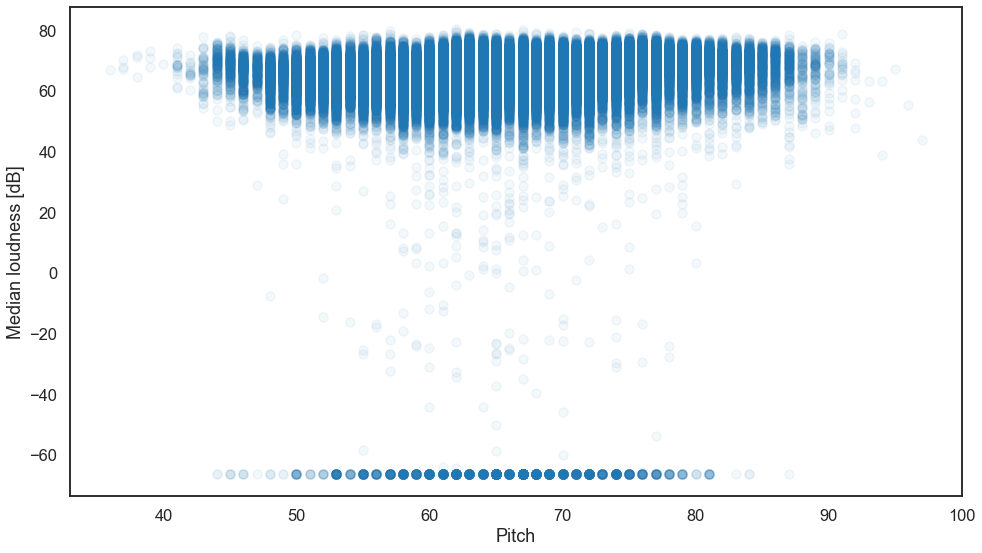

In [75]:
X = solos[["pitch", "loud_med"]].values
x = X[:,0]
y = X[:,1]

fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(x,y, alpha=0.05)

plt.xlabel("Pitch")
plt.ylabel("Median loudness [dB]")
plt.show()

The visual impression is that of a cloud from which rain drops down and forms a puddle. Which trends can we observe?

## Comparing performers

Taking all pieces together was not really informative. Maybe a somewhat closer look brings more to the front. Let us some specific performers whose solos we want to compare.

In [76]:
selected_performers = ["Charlie Parker", "Miles Davis", "Louis Armstrong", "Herbie Hancock", "Von Freeman", "Red Garland"]

In [78]:
grouped_df = solos.groupby("performer")

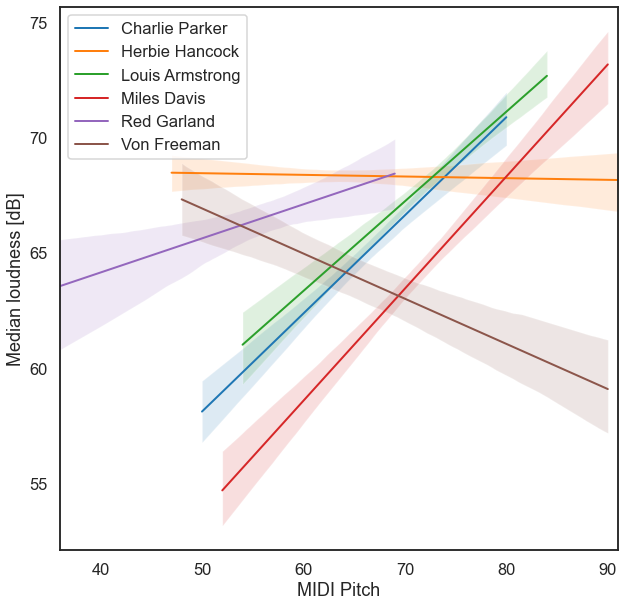

In [79]:
fig, ax = plt.subplots(figsize=(10,10))

for performer, df in grouped_df:
    if performer in selected_performers:
        sns.regplot(
            data=df, 
            x="pitch", 
            y="loud_med", 
            x_jitter=.1, 
            y_jitter=.1, 
            scatter_kws={"alpha":.01, "color":"grey"}, 
            line_kws={"lw":2},
            label=performer,
            scatter=False,
            ax=ax
        )
        
plt.xlabel("MIDI Pitch")
plt.ylabel("Median loudness [dB]")
plt.legend()
plt.show()

**Observations:**

1. Most performers increase loudness with increasing pitch.
1. Charlie Parker (sax) and Louis Armstrong (t) show very similar patterns but Armstrong is generally higher.
1. Miles Davis (t) is similar to the two but plays generally softer than both.
1. Von Freeman (sax) strongly and Herbie Hancock (p) weakly decrease loudness with increasing pitch (almost all other performers show positive correlations).
1. Red Garland (p) plays generally lower than Herbie Hancock (p) but does show a positive correlation between pitch and loudness (NB: there is only one solo in the database).

Does this tell us something about performer styles or about instruments?